In [1]:
%load_ext autoreload
%autoreload 2

09:55:08 - INFO: Sampling 8 new images....
699it [01:59,  5.84it/s]


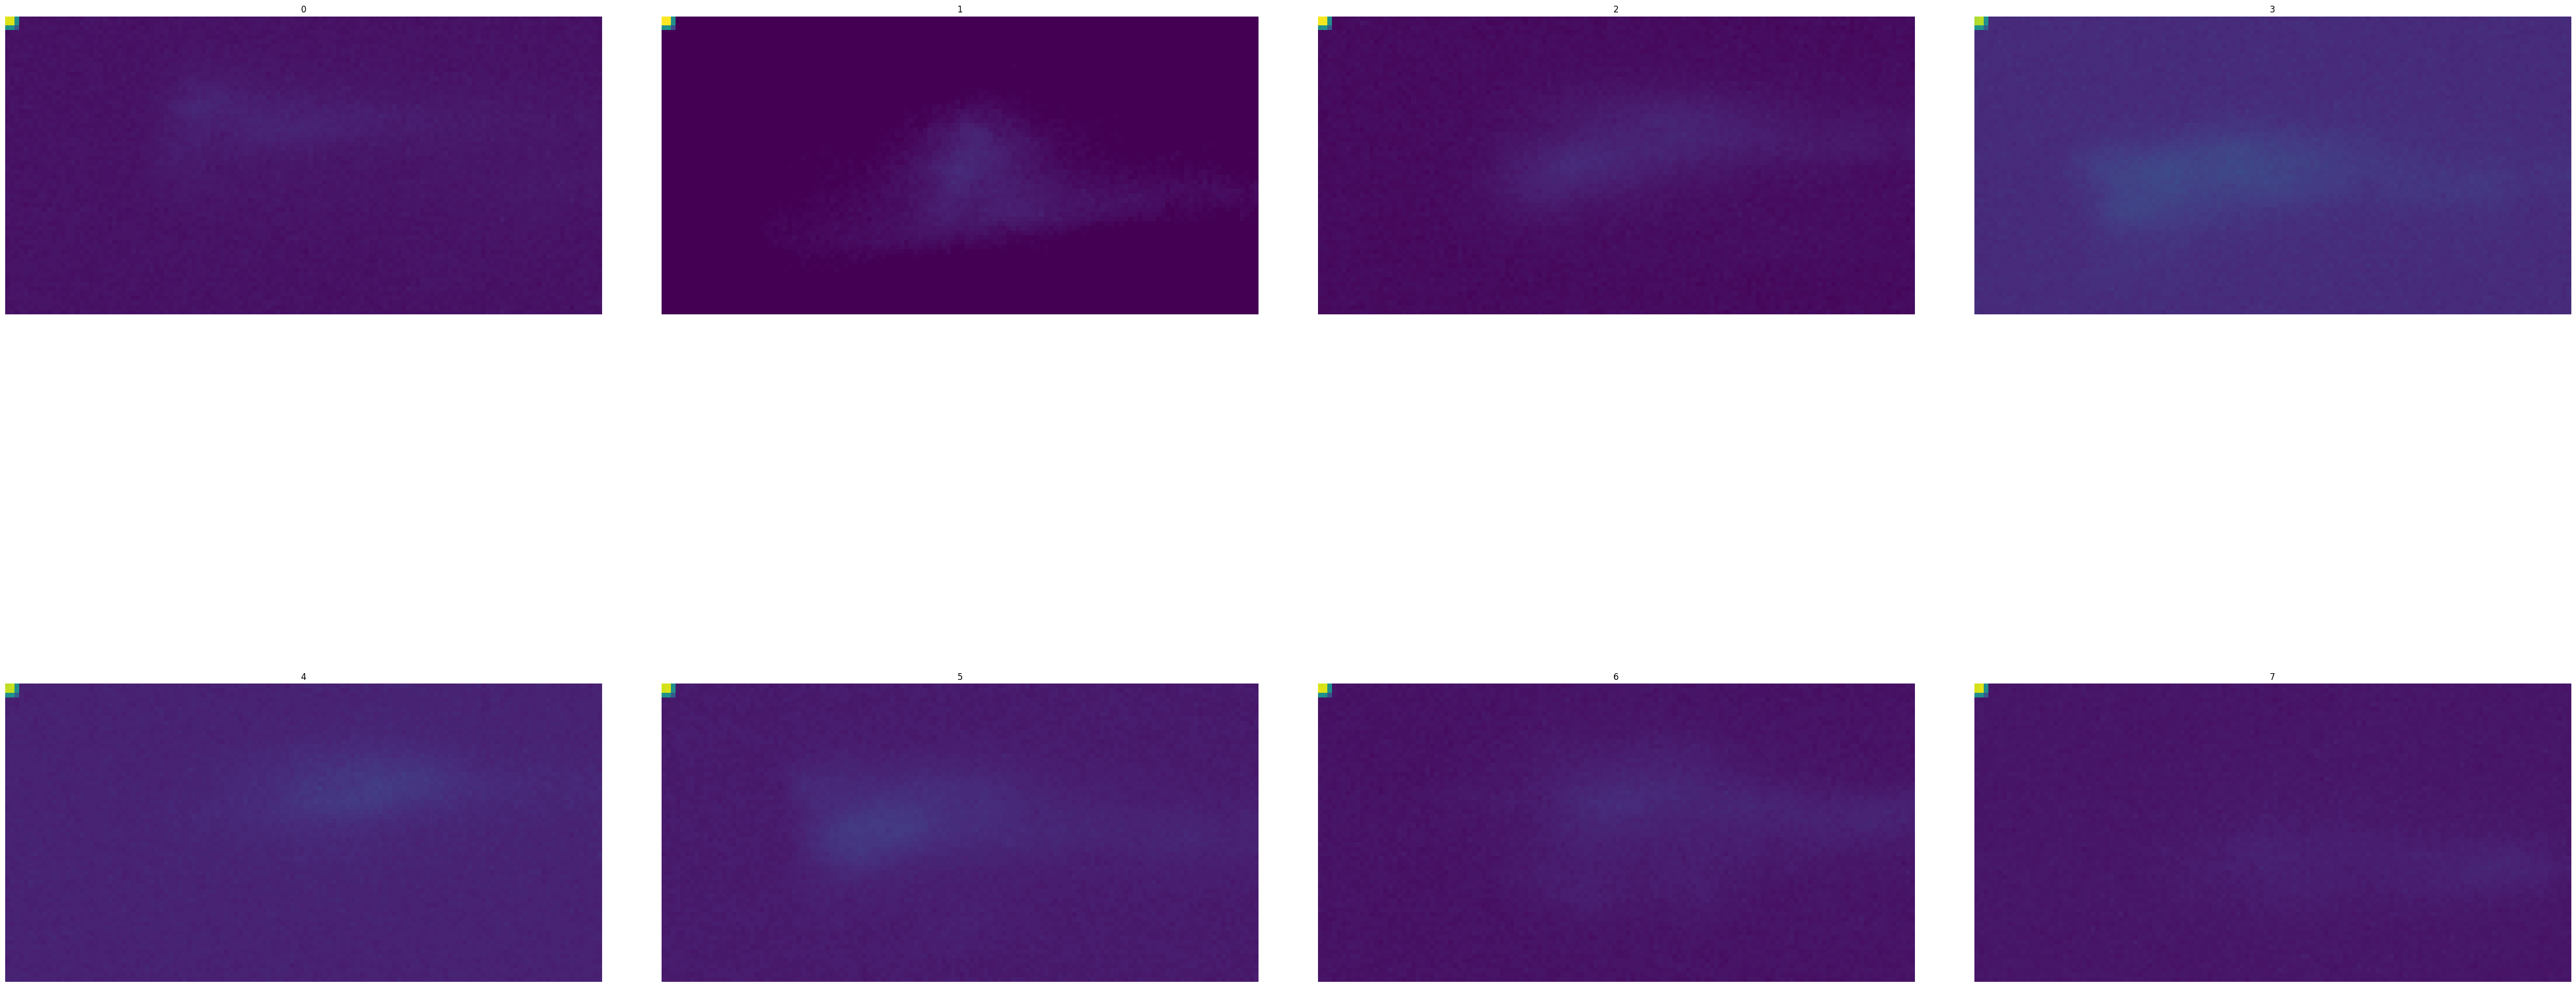

In [4]:
from ddpm_conditional import *
from utils import plot_images, plot_images_from_dir

n = 8
device = "cuda:1"
model = UNet_conditional(img_width=128, img_height=64, feat_num=3, device=device).to(device)
# ckpt = torch.load("models/transfer/ema_ckpt.pt")
ckpt = torch.load("models/transfer_specific_lr1e-3def/ema_ckpt.pt")
model.load_state_dict(ckpt)
diffusion = Diffusion(img_width=128, img_height=64, device=device, noise_steps=700)
y = torch.Tensor([30,6,50]).to(device).float().unsqueeze(0) # parameter vector
x = diffusion.sample(model, n, y, cfg_scale=3)
plot_images(x)
save_samples(x)

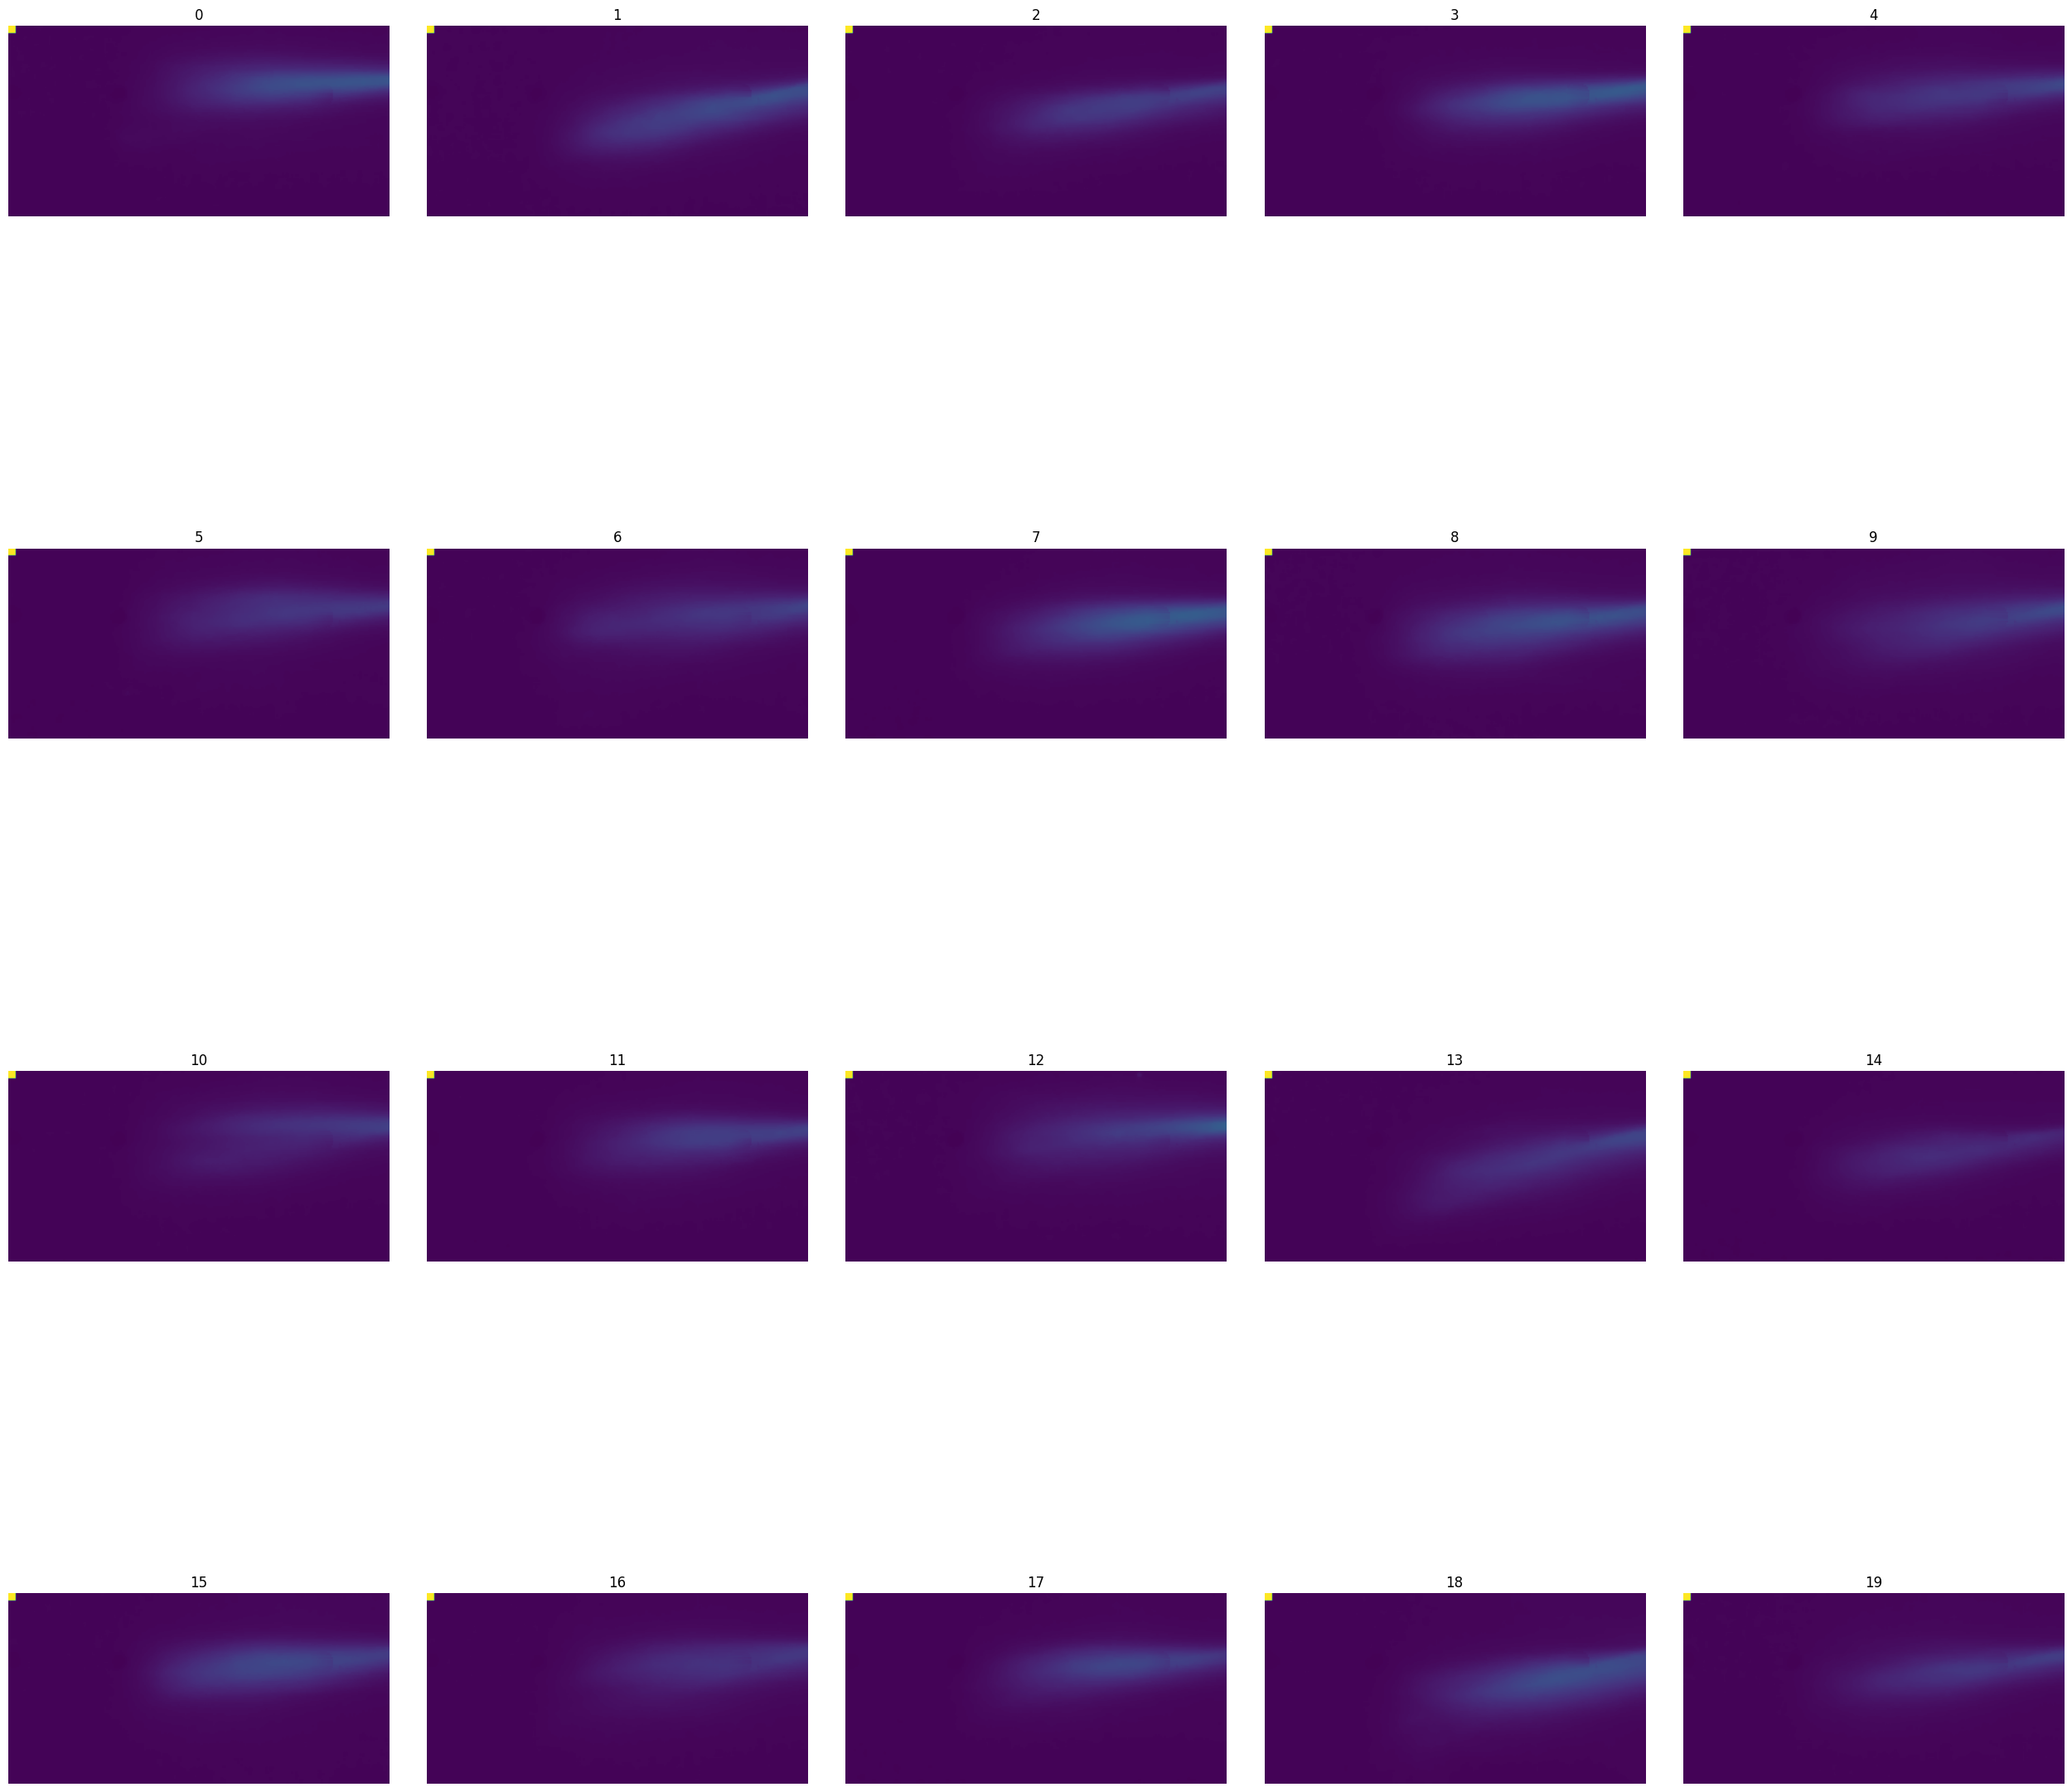

In [5]:
plot_images_from_dir("train/4", 20)